In [0]:
from keras.datasets import mnist

(x_train,y_train) , (x_test,y_test)=mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


5


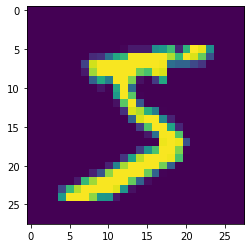

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

In [0]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#creating model
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#max-pooling
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128 , activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10 , activation='softmax'))

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train, validation_data = (x_test,y_test) , epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 156s 3ms/step - loss: 0.4529 - accuracy: 0.9021 - val_loss: 0.0677 - val_accuracy: 0.9787
Epoch 2/3
60000/60000 [==============================] - 155s 3ms/step - loss: 0.1378 - accuracy: 0.9608 - val_loss: 0.0502 - val_accuracy: 0.9840
Epoch 3/3
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1057 - accuracy: 0.9689 - val_loss: 0.0472 - val_accuracy: 0.9842


In [0]:
print(model.evaluate(x_test,y_test))

10000/10000 [==============================] - 5s 532us/step
[0.04716502083337837, 0.9842000007629395]


In [0]:
model.predict(x_test[:4])

array([[1.56189157e-12, 7.86810450e-10, 9.84005655e-10, 3.96652622e-09,
        5.80926626e-12, 2.62635169e-14, 1.71196201e-14, 9.99999881e-01,
        1.06355585e-13, 1.34195389e-07],
       [1.24959183e-06, 3.89787165e-05, 9.99959588e-01, 3.80192411e-09,
        2.27196845e-10, 3.16404238e-13, 2.51700300e-07, 1.36240061e-10,
        4.94070607e-09, 1.17624606e-12],
       [6.10542658e-11, 9.99998569e-01, 1.86699420e-10, 2.26671763e-12,
        5.81205484e-07, 1.26875288e-10, 4.13391300e-11, 8.08102243e-07,
        4.50994264e-09, 3.02756087e-09],
       [9.99989152e-01, 4.75292445e-08, 5.16445873e-08, 3.38309327e-08,
        1.33400979e-08, 3.10226902e-08, 2.07508447e-06, 8.81996201e-08,
        1.63381480e-06, 6.85826535e-06]], dtype=float32)

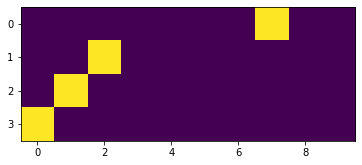

In [0]:
plt.imshow(model.predict(x_test[:4]))

In [0]:
print(y_test[:4])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
